In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
%matplotlib inline

In [2]:
data = pd.read_csv("results_100_v2.csv")
print(data.keys())

Index(['Unnamed: 0', 'One-seater', 'Two-seater', 'Four-seater', 'Staff',
       'Store_to_seating', 'Expand', 'Ordered', 'LeaveSeating',
       'OneSeaterUtil', 'OrderQueueTime', 'LeaveQueue', 'TakeawayTime',
       'EntitiesIn', 'EntitiesOut', 'OneSeaterDeliveryTime',
       'TwoSeaterDeliveryTime', 'FourSeaterDeliveryTime', 'StaffUtil'],
      dtype='object')


,Unnamed: 0,One-seater,Two-seater,Four-seater,Staff,Store_to_seating,Expand,Ordered,LeaveSeating,OneSeaterUtil,OrderQueueTime,LeaveQueue,TakeawayTime,EntitiesIn,EntitiesOut,OneSeaterDeliveryTime,TwoSeaterDeliveryTime,FourSeaterDeliveryTime,StaffUtil,profit
4,23114,22,21,15,3,0,1,4030,13,0.538,18.949,0,86.932,2911.5,2883.8,41.099,41.338,42.235,0.502,12126.0
26,18445,17,22,2,4,1,0,3765,232,0.668,3.094,0,85.903,2883.2,2856.6,41.066,41.358,41.084,0.354,12001.5
27,35018,36,32,6,3,0,1,4059,12,0.339,19.234,0,86.749,2923.9,2892.6,40.918,41.298,39.757,0.504,12230.4
36,36508,38,31,6,3,0,1,4059,12,0.321,19.234,0,86.749,2923.9,2892.6,40.918,41.298,39.757,0.504,12230.4
75,34928,36,26,9,3,0,1,4033,1,0.334,20.097,0,87.390,2907.3,2876.1,41.356,40.95,41.427,0.503,12136.8


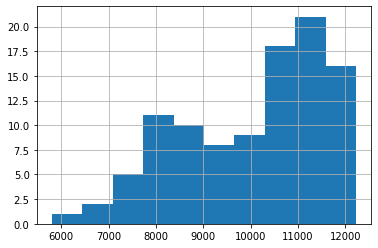

In [3]:
# profit = 3.5*data['customers ordered'] + (data['Store_to_seating'] - 1)*data['customers ordered'] - data['Expand']*1500 - data['Staff']*294
percentStoreBuyers = 1/100
storePurchaseAmount = 10
profit = (3.5*data['Ordered']) - ((data['Store_to_seating'] - 1)*data['Ordered']*percentStoreBuyers*storePurchaseAmount) - (data['Expand']*1500) - ((data['Staff'])*294)
data['profit'] = profit
data['profit'].hist()
data.max()
data[data['profit']>12000]

In [21]:
X = data[['Store_to_seating', 'One-seater','Two-seater', 'Four-seater', 'Staff', 'Expand']]
y = data[['profit']]

# to_encode = ['Store_to_seating', 'Expand']
# X = pd.get_dummies(X, prefix_sep="_", columns=to_encode, drop_first=True)

to_log_trans = ['One-seater','Two-seater', 'Four-seater']

X[to_log_trans] = X[to_log_trans].apply(np.log1p, axis =1)

from sklearn.preprocessing import MinMaxScaler
# y = np.sqrt(y)

# scaler = MinMaxScaler()
# y = scaler.fit_transform(y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd937c9ea10>,
      dtype=object)

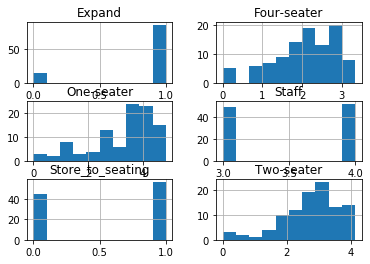

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X.hist()

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)

print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("linear regression coefficients:", lr.coef_)
print ("linear regression intercept:", lr.intercept_)


linear regression train score: 0.899059733836021
linear regression test score: 0.9229614532044473
linear regression coefficients: [[ -836.61388617  1548.00232475  2102.60068773  1042.22007575
   -306.67339854 -3205.69302007]]
linear regression intercept: [1293.93804311]


In [7]:
X_ols = sm.add_constant(X)
lin_reg = sm.OLS(y, X_ols).fit()
lin_reg.summary()

/home/rms/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           1.37e-47
Time:                        18:20:28   Log-Likelihood:                -760.22
No. Observations:                 101   AIC:                             1534.
Df Residuals:                      94   BIC:                             1553.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1756.7239    496.400      3.539      0.001     771.110    2742.338
Store_to_seating  -837.8920    101.194     -8.280      0.000   -1038.816    -636.968
One-seater        1501.5459     55.621     26.996      0.000    1391.109    1611.983
Two-seater        2031.7252     70.789     28.701      0.000    1891.172    2172.279
Four-seater       1024.1842     68.914     14.862      0.000     887.355    1161.014
Staff             -294.9709     93.855     -3.143      0.002    -481.322    -108.620
Expand           -3277.2516    173.898    -18.846      0.000   -3622.530   -2931.973
==============================================================================
Omnibus:                        0.963   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.970
Skew:                           0.089   Prob(JB):                        0.616
Kurtosis:                       2.554   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_feats = PolynomialFeatures(degree=degree)#, interaction_only=True, include_bias=False)
x_train_cnst = sm.add_constant(X)
xp = poly_feats.fit_transform(x_train_cnst)

lin_reg_poly = sm.OLS(y, xp).fit()
lin_reg_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     62.90
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           1.26e-40
Time:                        18:20:28   Log-Likelihood:                -730.15
No. Observations:                 101   AIC:                             1510.
Df Residuals:                      76   BIC:                             1576.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1315.2513    351.179      3.745      0.000     615.818    2014.685
x1          1315.2513    351.179      3.745      0.000     615.818    2014.685
x2           268.7885    448.661      0.599      0.551    -624.797    1162.373
x3          -533.6220    375.129     -1.423      0.159   -1280.757     213.513
x4          -993.5926    548.124     -1.813      0.074   -2085.277      98.092
x5         -1043.2343    472.622     -2.207      0.030   -1984.542    -101.927
x6          2155.2566    572.332      3.766      0.000    1015.358    3295.155
x7           157.1353    939.566      0.167      0.868   -1714.172    2028.443
x8          1315.2513    351.179      3.745      0.000     615.818    2014.685
x9           268.7885    448.661      0.599      0.551    -624.797    1162.373
x10         -533.6220    375.129     -1.423      0.159   -1280.757     213.513
x11         -993.5926    548.124     -1.813      0.074   -2085.277      98.092
x12        -1043.2343    472.622     -2.207      0.030   -1984.542    -101.927
x13         2155.2566    572.332      3.766      0.000    1015.358    3295.155
x14          157.1353    939.566      0.167      0.868   -1714.172    2028.443
x15          268.7885    448.661      0.599      0.551    -624.797    1162.373
x16         -232.0237    162.838     -1.425      0.158    -556.344      92.297
x17         -268.1972    204.464     -1.312      0.194    -675.423     139.029
x18         -182.7766    167.078     -1.094      0.277    -515.541     149.988
x19          -19.6407    183.669     -0.107      0.915    -385.450     346.168
x20          313.7574    420.071      0.747      0.457    -522.887    1150.402
x21           82.9460     66.541      1.247      0.216     -49.582     215.474
x22          494.0567    164.388      3.005      0.004     166.650     821.463
x23          235.1002    119.332      1.970      0.052      -2.571     472.771
x24          109.6918    109.012      1.006      0.317    -107.424     326.808
x25          -55.5695    279.745     -0.199      0.843    -612.730     501.591
x26          327.7215     89.573      3.659      0.000     149.322     506.121
x27          409.7185    139.668      2.934      0.004     131.546     687.891
x28           97.0581    157.276      0.617      0.539    -216.184     410.300
x29         -283.6229    375.277     -0.756      0.452   -1031.052     463.807
x30          276.9686    102.097      2.713      0.008      73.624     480.313
x31          156.2903    152.898      1.022      0.310    -148.233     460.814
x32         -175.8925    391.586     -0.449      0.655    -955.804     604.019
x33         -696.2197    226.327     -3.076      0.003   -1146.989    -245.451
x34         -737.3454    433.114     -1.702      0.093   -1599.967     125.277
x35          157.1353    939.566      0.167      0.868   -1714.172    2028.443
==